# How Player Height Affects the NBA
### Analysis Team
*Lindsay Reynolds, Nick Sheets*

In [1]:
#%matplotlib notebook
#take out the hashtag if we will use this

In [2]:
# Set up dependencies and read in csv files needed
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read in stats csv file from data exploration/cleanup process
player_stats_path = os.path.join("Output_files_for_analysis", "player_stats.csv")

nba_stats_df = pd.read_csv(player_stats_path)
nba_stats_df

,Unnamed: 0,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,0,AJ Hammons,84.0,2.200000,1.600000,0.200000,Purdue,USA,DAL,"6'10"" - 7'"
1,1,Aaron Brooks,72.0,3.650000,0.800000,1.250000,Oregon,USA,MIN,<= 6ft
2,2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"6'7"" - 6'9"""
3,3,Aaron Harrison,78.0,3.450000,1.650000,0.900000,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...,...
743,743,Zach Lofton,76.0,0.000000,0.000000,0.000000,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,744,Zach Randolph,81.0,14.300000,7.450000,1.950000,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,745,Zaza Pachulia,83.0,5.133333,4.833333,1.600000,None,Georgia,GSW,"6'10"" - 7'"
746,746,Zhaire Smith,76.0,6.700000,2.200000,1.700000,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [4]:
# Need to drop the extra column of index
del nba_stats_df['Unnamed: 0']
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.0,2.200000,1.600000,0.200000,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.0,3.650000,0.800000,1.250000,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.0,3.450000,1.650000,0.900000,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.0,0.000000,0.000000,0.000000,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.0,14.300000,7.450000,1.950000,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.0,5.133333,4.833333,1.600000,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.0,6.700000,2.200000,1.700000,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [5]:
# Read in csv file including salary from data exploration/cleanup process
nba_stats_with_salary_path = os.path.join("Output_files_for_analysis", "player_stats_with_sal.csv")
nba_stats_with_salary_df = pd.read_csv(nba_stats_with_salary_path)
nba_stats_with_salary_df

,Unnamed: 0,player_name,height (in),pts,reb,ast,college,country,team,2020-21
0,2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"$18,136,364"
1,4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"$2,345,640"
2,6,Abdel Nader,78.0,3.500000,1.700000,0.400000,Iowa State,Egypt,BOS,"$1,752,950"
3,8,Al Horford,82.0,13.500000,6.966667,4.633333,Florida,Dominican Republic,BOS,"$27,500,000"
4,10,Al-Farouq Aminu,81.0,9.133333,7.500000,1.366667,Wake Forest,USA,POR,"$9,720,900"
...,...,...,...,...,...,...,...,...,...,...
319,747,Willie Cauley-Stein,84.0,10.933333,6.633333,1.966667,Kentucky,USA,SAC,"$4,000,000"
320,756,Yuta Watanabe,81.0,2.600000,2.100000,0.500000,George Washington,Japan,MEM,"$321,893"
321,757,Zach Collins,84.0,5.500000,3.750000,0.850000,Gonzaga,USA,POR,"$5,406,255"
322,758,Zach LaVine,77.0,19.766667,4.000000,3.500000,UCLA,USA,MIN,"$19,500,000"


In [6]:
# Need to drop the extra column of index
del nba_stats_with_salary_df['Unnamed: 0']
nba_stats_with_salary_df

,player_name,height (in),pts,reb,ast,college,country,team,2020-21
0,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"$18,136,364"
1,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"$2,345,640"
2,Abdel Nader,78.0,3.500000,1.700000,0.400000,Iowa State,Egypt,BOS,"$1,752,950"
3,Al Horford,82.0,13.500000,6.966667,4.633333,Florida,Dominican Republic,BOS,"$27,500,000"
4,Al-Farouq Aminu,81.0,9.133333,7.500000,1.366667,Wake Forest,USA,POR,"$9,720,900"
...,...,...,...,...,...,...,...,...,...
319,Willie Cauley-Stein,84.0,10.933333,6.633333,1.966667,Kentucky,USA,SAC,"$4,000,000"
320,Yuta Watanabe,81.0,2.600000,2.100000,0.500000,George Washington,Japan,MEM,"$321,893"
321,Zach Collins,84.0,5.500000,3.750000,0.850000,Gonzaga,USA,POR,"$5,406,255"
322,Zach LaVine,77.0,19.766667,4.000000,3.500000,UCLA,USA,MIN,"$19,500,000"


### Data Analysis

In [7]:
players = nba_stats_df['player_name'].unique()
print(len(players))

748


In [8]:
# Binning the heights
group_names = ["<= 6ft", "6'1\" - 6'3\"", "6'4\" - 6'6\"", "6'7\" - 6'9\"", "6'10\" - 7'", "> 7ft"]
bins = [0, 72, 75, 78, 81, 84, 87]

nba_stats_df["Height Range"] = pd.cut(nba_stats_df["height (in)"], bins, labels=group_names)
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.0,2.200000,1.600000,0.200000,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.0,3.650000,0.800000,1.250000,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.0,15.433333,6.800000,2.633333,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.0,3.450000,1.650000,0.900000,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.0,5.900000,1.300000,1.700000,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.0,0.000000,0.000000,0.000000,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.0,14.300000,7.450000,1.950000,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.0,5.133333,4.833333,1.600000,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.0,6.700000,2.200000,1.700000,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [9]:
binning_nba_heights_df = nba_stats_df.groupby(by = "Height Range").count()["height (in)"].to_frame()

binning_nba_heights_df = binning_nba_heights_df.rename(columns={'height (in)':'player_count'})
binning_nba_heights_df

,player_count
Height Range,
<= 6ft,22
"6'1"" - 6'3""",109
"6'4"" - 6'6""",202
"6'7"" - 6'9""",233
"6'10"" - 7'",161
> 7ft,21


In [10]:
# Update the format of percentages in the following
pd.options.display.float_format = '{:.2f}%'.format

In [11]:
# Show number of players for each Height bin and also the percentage of total
binning_nba_heights_df['perc_of_players'] = binning_nba_heights_df / len(players) * 100
binning_nba_heights_df

,player_count,perc_of_players
Height Range,,
<= 6ft,22,2.94%
"6'1"" - 6'3""",109,14.57%
"6'4"" - 6'6""",202,27.01%
"6'7"" - 6'9""",233,31.15%
"6'10"" - 7'",161,21.52%
> 7ft,21,2.81%


In [12]:
nba_stats_df

,player_name,height (in),pts,reb,ast,college,country,team,Height Range
0,AJ Hammons,84.00%,2.20%,1.60%,0.20%,Purdue,USA,DAL,"6'10"" - 7'"
1,Aaron Brooks,72.00%,3.65%,0.80%,1.25%,Oregon,USA,MIN,<= 6ft
2,Aaron Gordon,81.00%,15.43%,6.80%,2.63%,Arizona,USA,ORL,"6'7"" - 6'9"""
3,Aaron Harrison,78.00%,3.45%,1.65%,0.90%,Kentucky,USA,CHA,"6'4"" - 6'6"""
4,Aaron Holiday,73.00%,5.90%,1.30%,1.70%,UCLA,USA,IND,"6'1"" - 6'3"""
...,...,...,...,...,...,...,...,...,...
743,Zach Lofton,76.00%,0.00%,0.00%,0.00%,New Mexico State,USA,DET,"6'4"" - 6'6"""
744,Zach Randolph,81.00%,14.30%,7.45%,1.95%,Michigan State,USA,SAC,"6'7"" - 6'9"""
745,Zaza Pachulia,83.00%,5.13%,4.83%,1.60%,None,Georgia,GSW,"6'10"" - 7'"
746,Zhaire Smith,76.00%,6.70%,2.20%,1.70%,Texas Tech,USA,PHI,"6'4"" - 6'6"""


In [13]:
# change back to values not percent
pd.options.display.float_format = '{:.2f}'.format
nba_stats_df.describe()

,height (in),pts,reb,ast
count,748.00,748.00,748.00,748.00
mean,78.87,7.20,3.09,1.62
std,3.36,5.46,2.24,1.57
min,69.00,0.00,0.00,0.00
25%,76.00,3.30,1.50,0.60
50%,79.00,5.80,2.58,1.10
75%,81.00,9.47,3.95,2.10
max,87.00,31.87,15.13,10.47


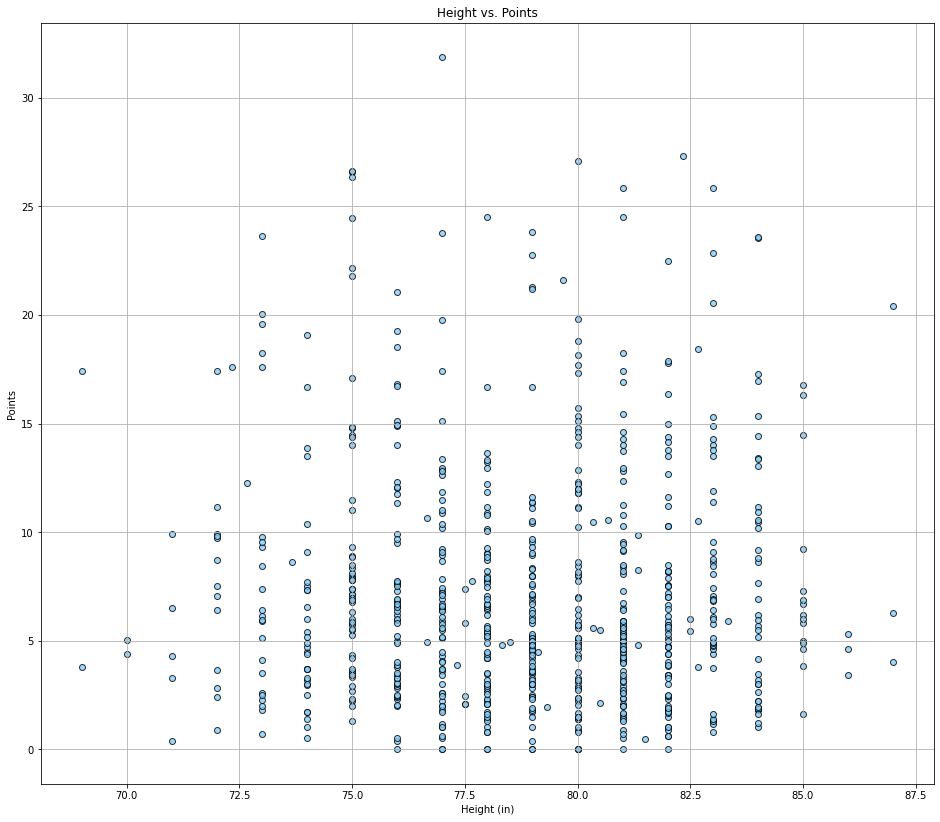

<Figure size 432x288 with 0 Axes>

In [32]:
# The maximum x value for our chart will be 100
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(64, x_limit, 2)

figure1 = plt.figure(figsize=(16,14))

plt.scatter(nba_stats_df['height (in)'], nba_stats_df['pts'], marker = 'o', facecolors='lightskyblue',\
                                      edgecolors="black", alpha=.80)
plt.title('Height vs. Points')
plt.xlabel('Height (in)')
plt.ylabel('Points')

plt.grid()
plt.show()
plt.tight_layout()

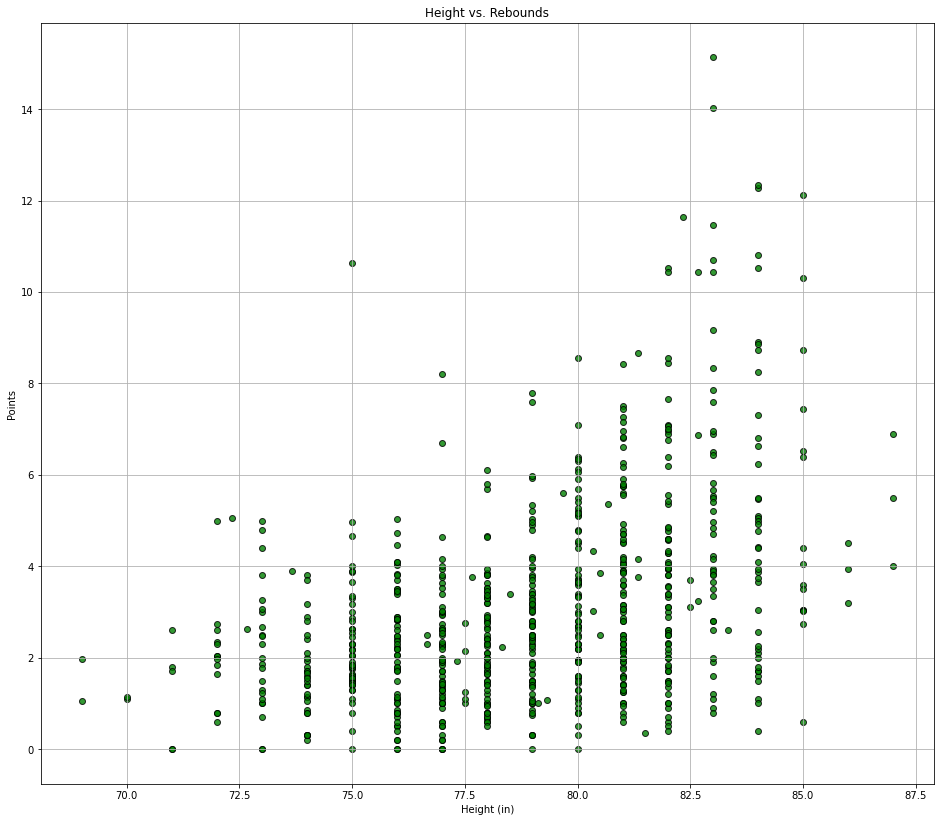

<Figure size 432x288 with 0 Axes>

In [39]:
# The maximum x value for our chart will be 100
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(64, x_limit, 2)

figure2 = plt.figure(figsize=(16,14))

plt.scatter(nba_stats_df['height (in)'], nba_stats_df['reb'], marker = 'o', facecolors='green',\
            edgecolors="black", alpha=.80)
plt.title('Height vs. Rebounds')
plt.xlabel('Height (in)')
plt.ylabel('Points')

plt.grid()
plt.show()
plt.tight_layout()

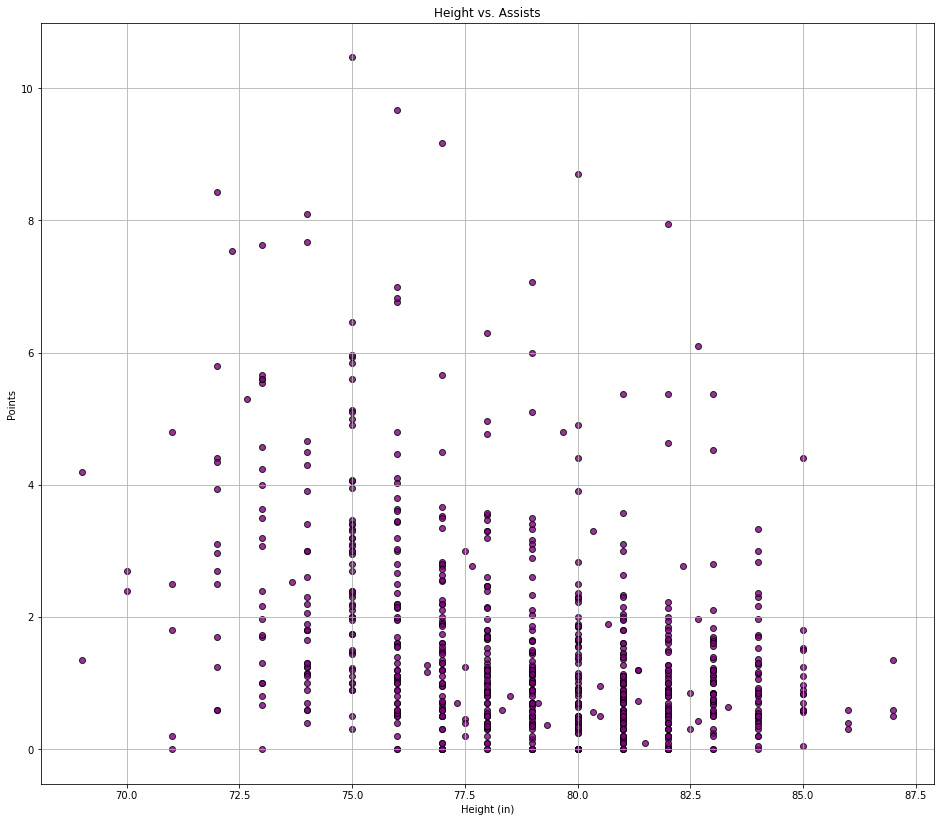

<Figure size 432x288 with 0 Axes>

In [40]:
# The maximum x value for our chart will be 100
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(64, x_limit, 2)

figure3 = plt.figure(figsize=(16,14))

plt.scatter(nba_stats_df['height (in)'], nba_stats_df['ast'], marker = 'o', facecolors='purple',\
            edgecolors="black", alpha=.80)
plt.title('Height vs. Assists')
plt.xlabel('Height (in)')
plt.ylabel('Points')

plt.grid()
plt.show()
plt.tight_layout()

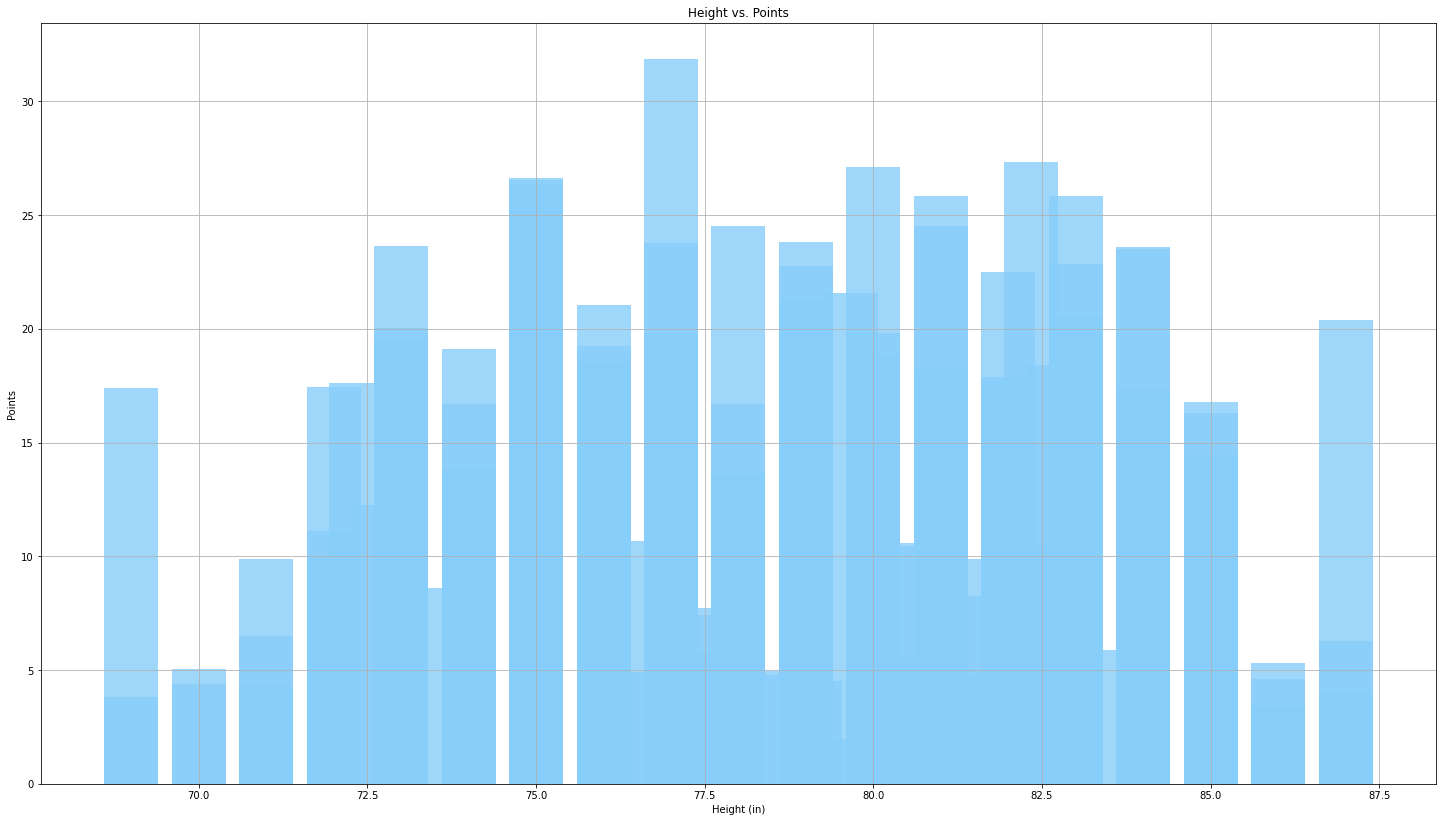

<Figure size 432x288 with 0 Axes>

In [35]:
# The maximum x value for our chart will be 100
x_limit = 90

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(64, x_limit, 2)

figure2 = plt.figure(figsize=(25,14))

plt.bar(nba_stats_df['height (in)'], nba_stats_df['pts'], color='lightskyblue', alpha=.80, align="center")
plt.title('Height vs. Points')
plt.xlabel('Height (in)')
plt.ylabel('Points')

plt.grid()
plt.show()
plt.tight_layout()

In [36]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

In [ ]:
# define a function that will allow simpler plotting
def show_plot(x_col, y_col):
    x_values = nba_stats_df.iloc[:,x_col]
    y_values = nba_stats_df[:,y_col]
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge)
    
    plt.title(plot_title)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.grid()
    plt.show()

In [ ]:
# Plot latitude vs max_temp, northern hemisphere
figure1 = plt.figure(figsize=(8,5))
plot_title = 'Height (in) vs. Points'
x_label_name = 'Height (in)'
y_label_name = 'Points'
face = 'lightpink'
edge= 'black'

# Set ylim 
#plt.ylim(0, 40)

# Plot with columns 1 and 2
figure1 = show_plot(1, 2)
plt.tight_layout()

plt.show()

In [ ]:

# for a function that includes the linear regression
def northern_calc_and_show_plot(x_col, y_col):
    x_values = northern_weather_df.iloc[:,x_col]
    y_values = northern_weather_df.iloc[:,y_col]
    
    # Calc of the pearsonr correlation
    correlation = sts.pearsonr(x_values, y_values)
    
    # Create the plot when the function is called
    plt.scatter(x_values, y_values, marker='o', facecolor=face, edgecolors=edge)
    
    # Updates to title/labels for the plot
    plt.title(plot_title)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.grid()
    
    # For linear regression line, calculate the values and plot the line
    lat_vs_slope, lat_vs_int, lat_vs_r, lat_vs_p, lat_vs_std_err = stats.linregress(x_values, y_values)
    line_fit = lat_vs_slope * x_values + lat_vs_int 
 
    plt.plot(x_values, line_fit,"r", label='y={:,.2f}x+{:.2f}'.format(lat_vs_slope,lat_vs_int))
    plt.legend(fontsize=10)
    
    # Print analysis details
    round_correlation = round(correlation[0], 2)
    print(f'pearsonr results: {correlation}.')
    print(f'The correlation between these two factors is {round_correlation}.')
    
    plt.show()    